In [2]:
import numpy as np                    # Biblioteca para manipulação númerica
import matplotlib.pyplot as plt       # Biblioteca para visualização e gráficos
import math                           # Biblioteca com funções matemáticas
import scipy as st
import pandas as pd
from scipy.odr import *
from scipy import interpolate
from scipy import optimize
from tabulate import tabulate
import statistics
from scipy.signal import find_peaks
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
'''
Coleta dos dados de Franck-Hertz.
'''

sh = gc.open_by_key("18J-fIf1EgtA2ZDmFb1Cuyb1UVlwFrzofvWfgorfMLbU")

sheetList_data = sh.worksheets()
data = []

for sheet in sheetList_data:
  voltage = sheet.col_values(1)
  current = sheet.col_values(2)
  temperature = sheet.col_values(3)
  voltage.pop(0)
  current.pop(0)
  temperature.pop(0)
  for x in enumerate(voltage):
    voltage[x[0]] = float(x[1])
  for y in enumerate(current):
    current[y[0]] = float(y[1])
  for z in enumerate(temperature):
    temperature[z[0]] = float(z[1])
  voltage = np.array(voltage)
  current = np.array(current)
  temperature = np.array(temperature)
  temperature_df = pd.DataFrame(temperature)
  data.append([np.array(voltage),np.array(current), np.array(temperature),float(temperature_df.mean()), float(temperature_df.std()), sheet.title])

In [ ]:
df = pd.DataFrame(data, index = list(range(1,13)), columns = ['Tensão [V]', 'Corrente [A]', 'Temperatura [°C]', 'Media_T [°C]', 'Desv_T [°C]', 'Descrição'])
df

,Tensão [V],Corrente [A],Temperatura [°C],Media_T [°C],Desv_T [°C],Descrição
1,"[-0.44, -0.44, -0.42, -0.43, -0.5, -0.39, -0.4...","[0.0405, 0.0413, 0.0401, 0.0401, 0.039, 0.0394...","[177.88, 177.88, 177.84, 177.84, 177.79, 177.7...",169.801120,4.989676,G100T150 - VA 49.99 - VR 0.50
2,"[-0.34, -0.35, -0.44, -0.43, -0.44, -0.34, -0....","[0.0413, 0.0409, 0.0398, 0.0398, 0.0398, 0.040...","[147.89, 147.91, 147.91, 147.91, 147.91, 147.9...",149.023071,0.381384,G100T150 - VA49.99 - VR 1.50
3,"[-0.28, -0.27, -0.3, -0.3, -0.34, -0.24, -0.3,...","[0.0394, 0.0401, 0.0394, 0.0401, 0.0394, 0.040...","[149.89, 149.93, 149.93, 149.94, 149.94, 149.9...",149.917013,0.278617,G100T150 - VA 49.99 - VR 2.50
4,"[-0.49, -0.42, -0.45, -0.45, -0.49, -0.38, -0....","[0.0986, 0.099, 0.0982, 0.0986, 0.099, 0.0994,...","[149.94, 149.94, 149.95, 149.96, 149.96, 149.9...",150.097297,0.306557,G76T150 - VA49.99 - VR 0.50
5,"[-0.31, -0.31, -0.38, -0.39, -0.31, -0.29, -0....","[0.0982, 0.0982, 0.0986, 0.0979, 0.099, 0.0982...","[150.48, 150.5, 150.5, 150.51, 150.51, 150.51,...",149.977948,0.226305,G76T150 - VA 49.99 - VR 1.50
6,"[-0.33, -0.22, -0.32, -0.23, -0.34, -0.28, -0....","[0.0982, 0.099, 0.0982, 0.0982, 0.0982, 0.0986...","[150.01, 150.0, 150.0, 149.98, 149.98, 149.95,...",149.891733,0.227412,G76T150 - VA 49.99 - VR 2.50
7,"[-0.52, -0.42, -0.47, -0.49, -0.4, -0.5, -0.39...","[0.0349, 0.039, 0.0383, 0.0379, 0.0394, 0.0375...","[180.3, 180.3, 180.31, 180.31, 180.34, 180.34,...",180.029257,0.318134,T180 - VA 49.99 - VR 0.50
8,"[-0.43, -0.45, -0.34, -0.35, -0.45, -0.43, -0....","[0.039, 0.0386, 0.0409, 0.0409, 0.0398, 0.0386...","[179.18, 179.18, 179.2, 179.2, 179.19, 179.19,...",179.780454,0.186240,T180 - VA49.99 - VR 1.50
9,"[-0.25, -0.28, -0.29, -0.32, -0.25, -0.32, -0....","[0.0431, 0.0443, 0.0435, 0.0435, 0.0431, 0.042...","[200.23, 200.23, 200.2, 200.2, 200.16, 200.16,...",185.113454,8.404870,T180 - VA 49.99 - VR 2.50
10,"[-0.38, -0.48, -0.37, -0.47, -0.37, -0.42, -0....","[0.0435, 0.0431, 0.0439, 0.042, 0.045, 0.0428,...","[200.3, 200.31, 200.31, 200.31, 200.31, 200.31...",200.127680,0.437880,T200 - VA 49.99 - VR 0.50


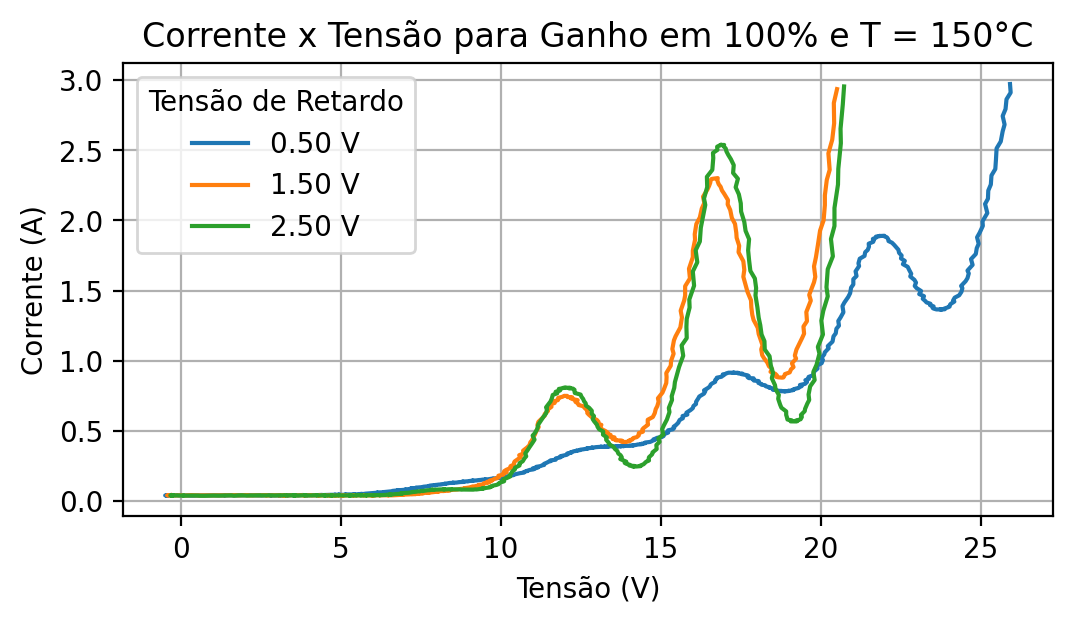

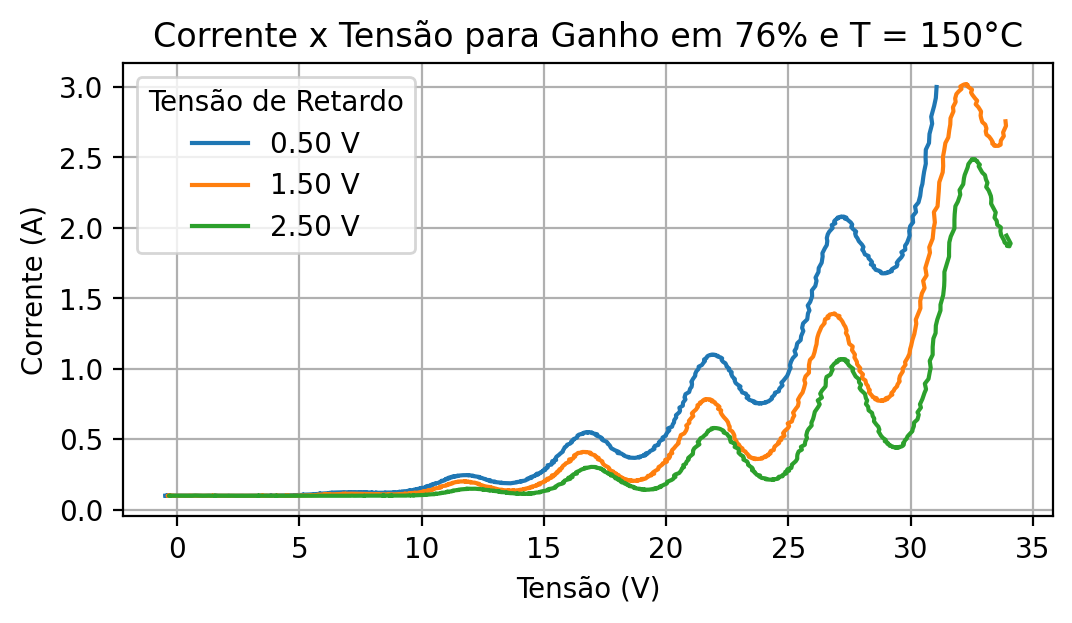

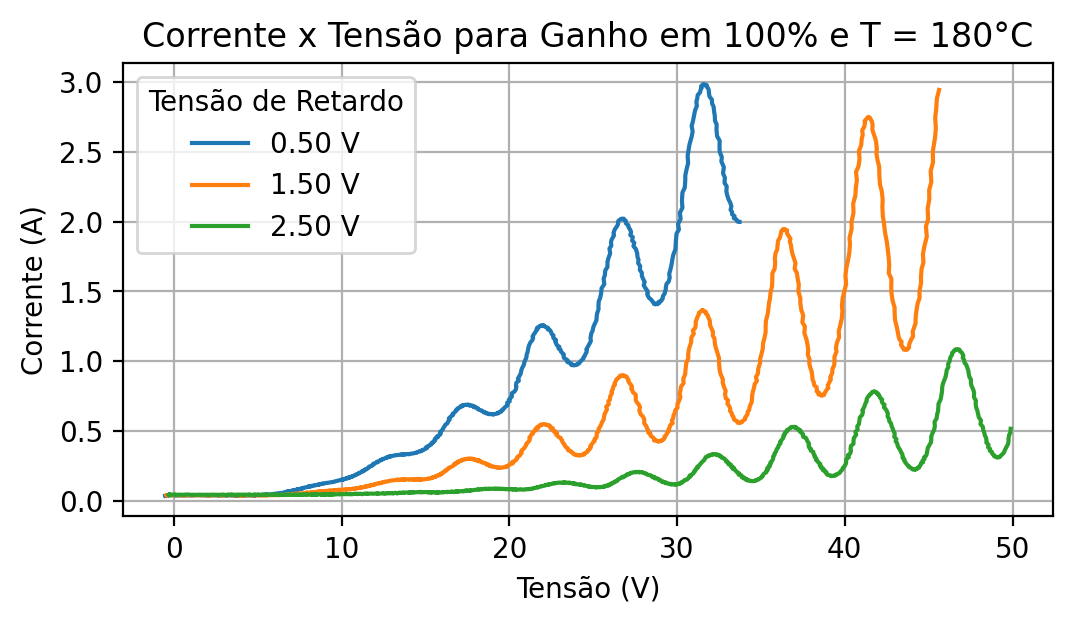

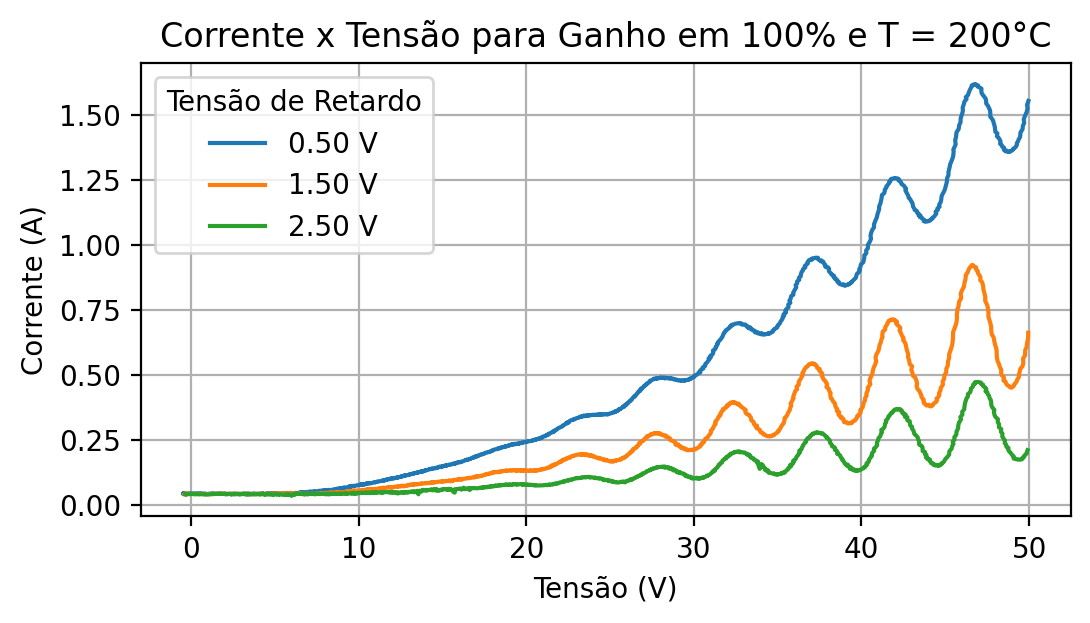

In [ ]:
'''
Mude a variavel lbl para a cor desejada para plotar o grafico respectivo.
'''
import re
lbl_list = ['G100T150','G76T150','T180','T200']
lbl_title = ['Ganho em 100% e T = 150°C','Ganho em 76% e T = 150°C','Ganho em 100% e T = 180°C','Ganho em 100% e T = 200°C']
for lbl in lbl_list:
    plt.rcParams['font.size'] = 10
    plt.figure(figsize=(6, 3), dpi=200)
    plt.title('Corrente x Tensão para '+lbl_title[lbl_list.index(lbl)])
    plt.xlabel('Tensão (V)')
    plt.ylabel('Corrente (A)')
    for i in enumerate(data):
      if lbl in i[1][5]:
        lgn = re.search('(?<=VR )\d+.\d+', i[1][5]).group(0)
        plt.plot(i[1][0], i[1][1],"-",label=lgn+' V')
    plt.grid(True,'both')
    plt.legend(title='Tensão de Retardo')
    plt.show()

[-0.38, 7.3, 11.92, 16.76, 21.91, 27.27]
[-0.19, 7.0, 11.75, 16.59, 21.69, 26.9, 32.27]
[0.73, 7.34, 11.83, 16.93, 21.94, 27.17, 32.51]


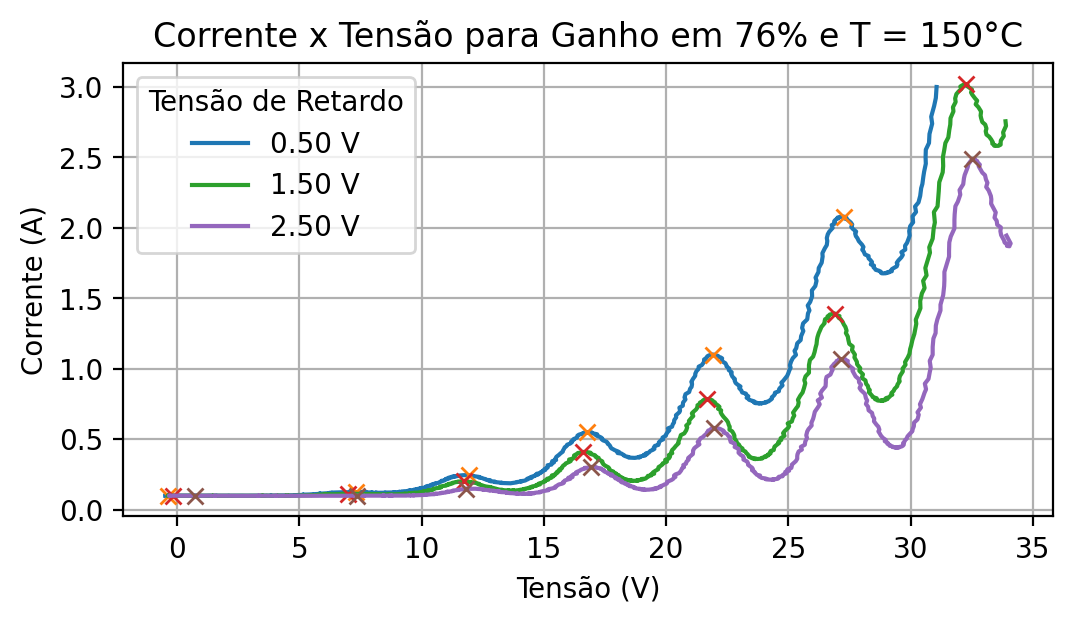

[5.06, 9.36, 13.48, 17.53, 22.03, 26.82, 31.58]
[4.91, 9.56, 13.65, 17.81, 22.03, 26.73, 31.48, 36.43, 41.42]
[-0.05, 6.24, 10.61, 14.73, 19.1, 23.32, 27.78, 32.21, 37.02, 41.8, 46.68]


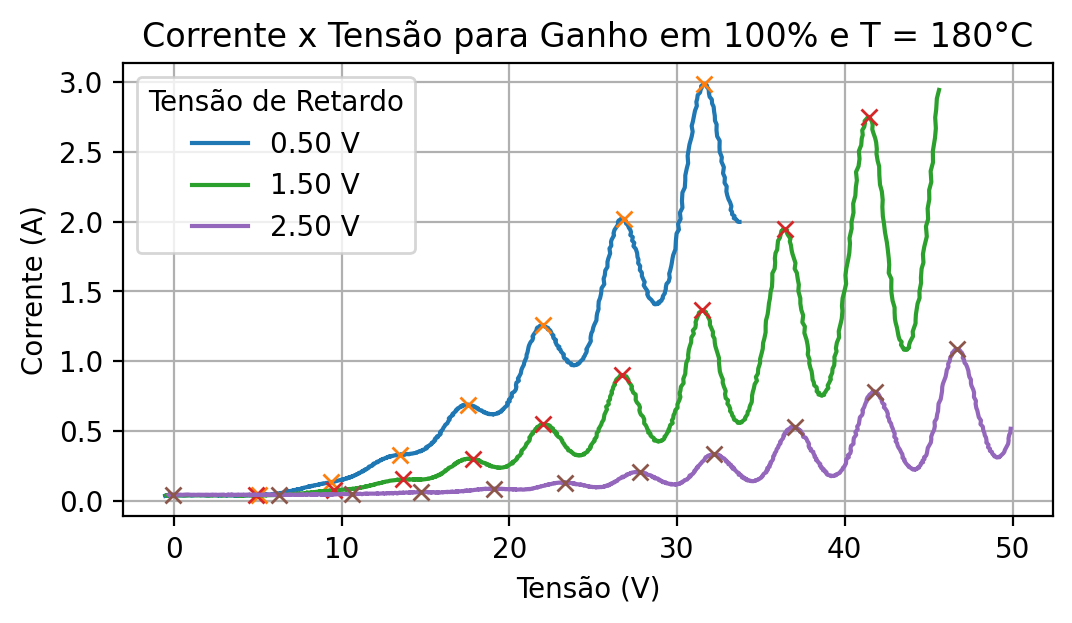

[-0.37, 7.68, 11.67, 15.79, 19.98, 24.08, 28.1, 32.71, 37.4, 42.01, 46.8]
[1.72, 6.86, 11.2, 15.18, 19.34, 23.37, 27.65, 32.34, 37.07, 41.9, 46.66]
[0.1, 6.34, 11.41, 15.47, 19.7, 23.74, 28.25, 32.67, 37.3, 42.29, 46.95]


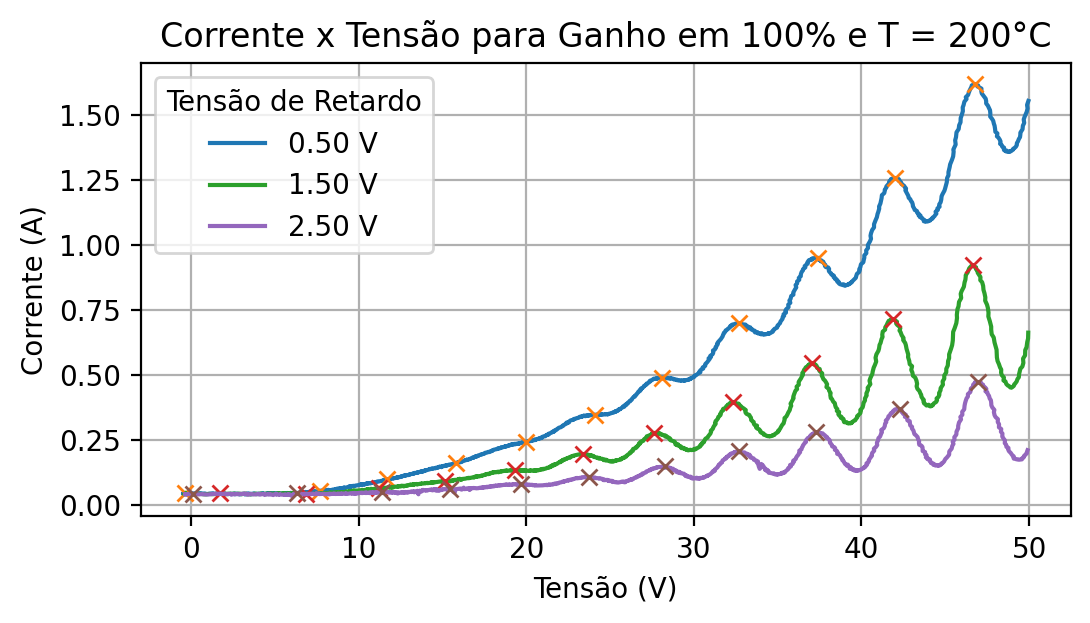

In [ ]:
'''
Mude a variavel lbl para a cor desejada para plotar o grafico respectivo.
'''

lbl_list = ['G76T150','T180','T200']
lbl_title = ['Ganho em 76% e T = 150°C','Ganho em 100% e T = 180°C','Ganho em 100% e T = 200°C']
for lbl in lbl_list:
    plt.rcParams['font.size'] = 10
    plt.figure(figsize=(6, 3), dpi=200)
    plt.title('Corrente x Tensão para '+lbl_title[lbl_list.index(lbl)])
    plt.xlabel('Tensão (V)')
    plt.ylabel('Corrente (A)')
    for i in enumerate(data):
      if lbl in i[1][5]:
        lgn = re.search('(?<=VR )\d+.\d+', i[1][5]).group(0)
        plt.plot(i[1][0], i[1][1],"-",label=lgn+' V')

        #Acha os picos
        y = i[1][1]
        peaks=find_peaks(y, distance=80)[0]
        x=[]
        for i in enumerate(i[1][0]):
            if i[0] in peaks:
                x.append(i[1])
        plt.plot(x, y[peaks], "x")
        print(x)

    plt.grid(True,'both')
    plt.legend(title='Tensão de Retardo')
    plt.show()


╒═════════════════════╤═══════════════════════╕
│ posição dos picos   │ picos                 │
╞═════════════════════╪═══════════════════════╡
│ [3, 4, 5]           │ [16.76, 21.91, 27.27] │
╘═════════════════════╧═══════════════════════╛
alfa=5.26+/-0.06
beta=0.96+/-0.25
╒═════════════════════╤═════════════════════════════╕
│ posição dos picos   │ picos                       │
╞═════════════════════╪═════════════════════════════╡
│ [3, 4, 5, 6]        │ [16.59, 21.69, 26.9, 32.27] │
╘═════════════════════╧═════════════════════════════╛
alfa=5.23+/-0.04
beta=0.85+/-0.20
╒═════════════════════╤══════════════════════════════╕
│ posição dos picos   │ picos                        │
╞═════════════════════╪══════════════════════════════╡
│ [3, 4, 5, 6]        │ [16.93, 21.94, 27.17, 32.51] │
╘═════════════════════╧══════════════════════════════╛
alfa=5.20+/-0.05
beta=1.25+/-0.24


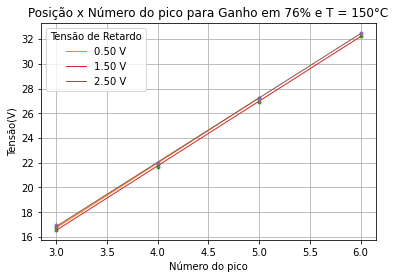

╒═════════════════════╤══════════════════════════════╕
│ posição dos picos   │ picos                        │
╞═════════════════════╪══════════════════════════════╡
│ [3, 4, 5, 6]        │ [17.53, 22.03, 26.82, 31.58] │
╘═════════════════════╧══════════════════════════════╛
alfa=4.69+/-0.05
beta=3.36+/-0.22
╒═════════════════════╤═════════════════════════════════════╕
│ posição dos picos   │ picos                               │
╞═════════════════════╪═════════════════════════════════════╡
│ [4, 5, 6, 7, 8]     │ [22.03, 26.73, 31.48, 36.43, 41.42] │
╘═════════════════════╧═════════════════════════════════════╛
alfa=4.85+/-0.04
beta=2.52+/-0.24
╒═════════════════════╤═════════════════════════════╕
│ posição dos picos   │ picos                       │
╞═════════════════════╪═════════════════════════════╡
│ [6, 7, 8, 9]        │ [32.21, 37.02, 41.8, 46.68] │
╘═════════════════════╧═════════════════════════════╛
alfa=4.82+/-0.01
beta=3.28+/-0.11


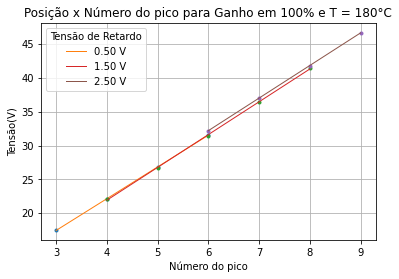

╒═════════════════════╤════════════════════════════╕
│ posição dos picos   │ picos                      │
╞═════════════════════╪════════════════════════════╡
│ [6, 7, 8, 9]        │ [32.71, 37.4, 42.01, 46.8] │
╘═════════════════════╧════════════════════════════╛
alfa=4.69+/-0.02
beta=4.57+/-0.18
╒═════════════════════╤═════════════════════════════╕
│ posição dos picos   │ picos                       │
╞═════════════════════╪═════════════════════════════╡
│ [6, 7, 8, 9]        │ [32.34, 37.07, 41.9, 46.66] │
╘═════════════════════╧═════════════════════════════╛
alfa=4.78+/-0.01
beta=3.65+/-0.10
╒═════════════════════╤═════════════════════════════╕
│ posição dos picos   │ picos                       │
╞═════════════════════╪═════════════════════════════╡
│ [6, 7, 8, 9]        │ [32.67, 37.3, 42.29, 46.95] │
╘═════════════════════╧═════════════════════════════╛
alfa=4.78+/-0.05
beta=3.92+/-0.37


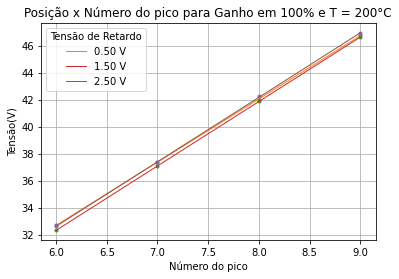


alfa médio = 4.92+/-0.04
betabeta médio = 2.71+/-0.21


In [ ]:

#Peguei as posições dos picos manualmente, onde os picos estão mais acentuados nos gráficos

#G76T150
x_1=[[16.76, 21.91, 27.27],[16.59, 21.69, 26.9, 32.27],[16.93, 21.94, 27.17, 32.51]] #posições dos picos
l_1=[[3,4,5],[3,4,5,6],[3,4,5,6]] #número dos picos

#T180
x_2=[[17.53, 22.03, 26.82, 31.58],[22.03, 26.73, 31.48, 36.43, 41.42],[32.21, 37.02, 41.8, 46.68]]
l_2=[[3,4,5,6],[4,5,6,7,8],[6,7,8,9]]

#T200
x_3=[[32.71, 37.4, 42.01, 46.8],[32.34, 37.07, 41.9, 46.66],[32.67, 37.3, 42.29, 46.95]]
l_3=[[6,7,8,9],[6,7,8,9],[6,7,8,9]]

lbl_list = ['VA 49.99 - VR 0.50', 'VA 49.99 - VR 1.50', 'VA 49.99 - VR 2.50']
lbl_title = ['Ganho em 76% e T = 150°C','Ganho em 100% e T = 180°C','Ganho em 100% e T = 200°C']

x=[x_1,x_2,x_3]
l=[l_1,l_2,l_3]

alfa = [] #lista de coef angular
alfa_sd = []
beta = [] #lista de coef linear
beta_sd = []

def f(A,t):
  return A[0]*t+A[1]

for i in list(range(len(x))):

  plt.title('Posição x Número do pico para ' +lbl_title[list(range(len(x))).index(i)])
  plt.xlabel('Número do pico')
  plt.ylabel('Tensão(V)')

  for j in list(range(len(x[i]))):

    linear = Model(f)
    mydata = Data(l[i][j], x[i][j], we=0.1, wd=0.1)
    myodr = ODR(mydata, linear, beta0=[5, 0])
    output = myodr.run()

    t=np.linspace(l[i][j][0], l[i][j][-1], 100)
    lgn = re.search('(?<=VR )\d+.\d+', lbl_list[j]).group(0)
    plt.plot(l[i][j], x[i][j], '.')
    plt.plot(t,f(output.beta,t), "-" , linewidth=1, label = lgn+' V')

    #Tabela com as posições dos picos
    table = [['posição dos picos', 'picos'], [l[i][j], x[i][j]]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

    #Coeficientes
    print("alfa={:.2f}+/-{:.2f}\nbeta={:.2f}+/-{:.2f}".format(output.beta[0],output.sd_beta[0],output.beta[1],output.sd_beta[1]))

    alfa.append(output.beta[0])
    alfa_sd.append(output.sd_beta[0])
    beta.append(output.beta[1])
    beta_sd.append(output.sd_beta[1])

  
  plt.grid(True,'both')
  plt.legend(title='Tensão de Retardo')
  plt.show()

#Média dos coeficientes
alfa_mean= statistics.mean(alfa)
alfa_sd_mean= statistics.mean(alfa_sd)
beta_mean= statistics.mean(beta)
beta_sd_mean= statistics.mean(beta_sd)

print("\nalfa médio = {:.2f}+/-{:.2f}\nbeta médio = {:.2f}+/-{:.2f}".format(alfa_mean,alfa_sd_mean,beta_mean,beta_sd_mean))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/p

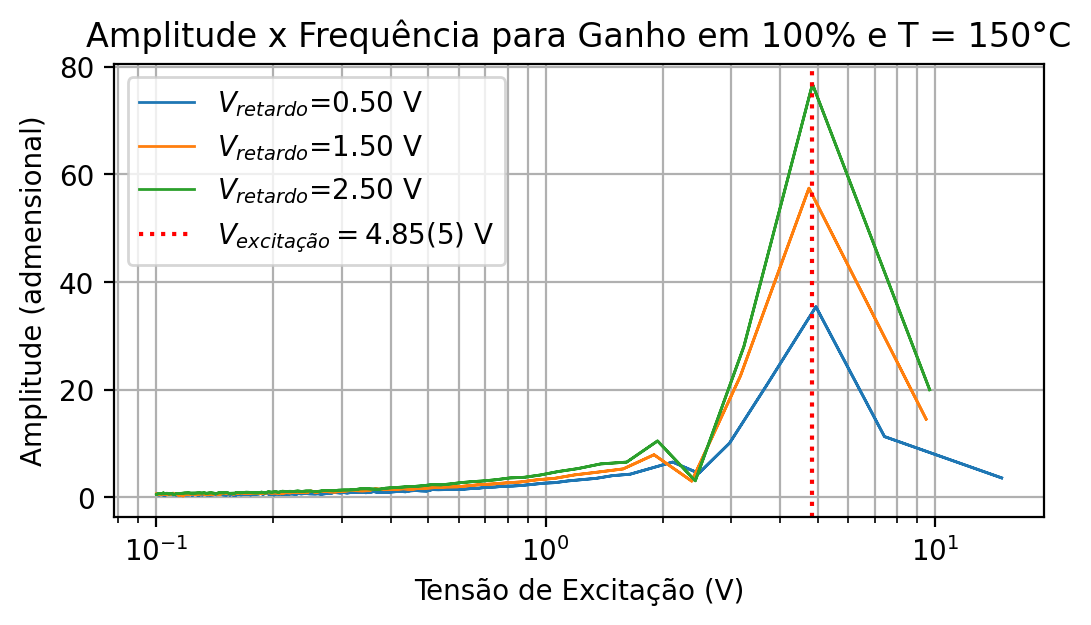

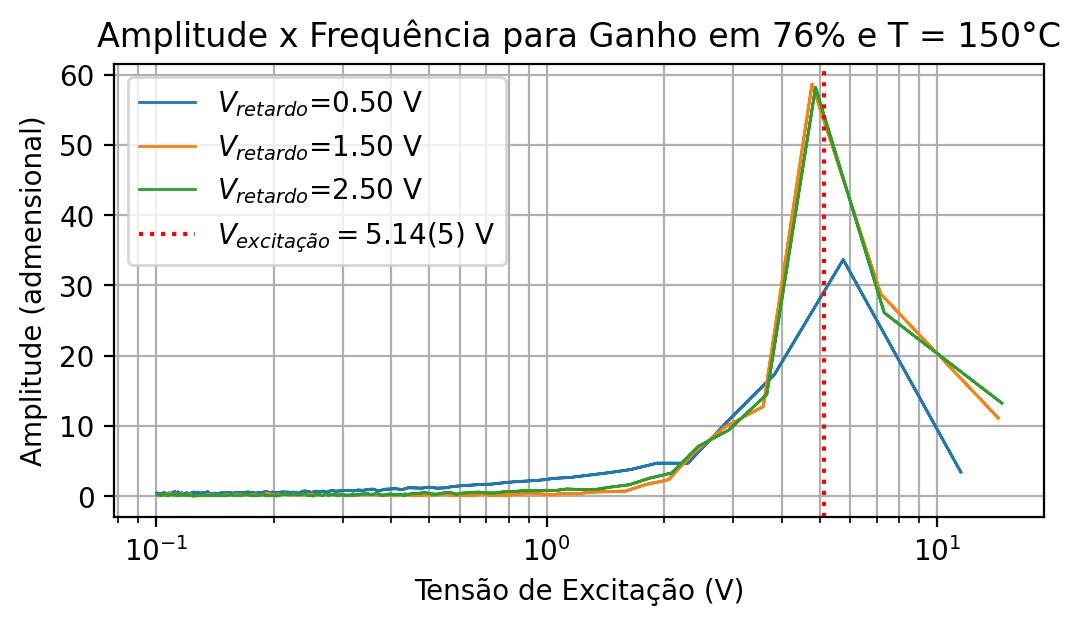

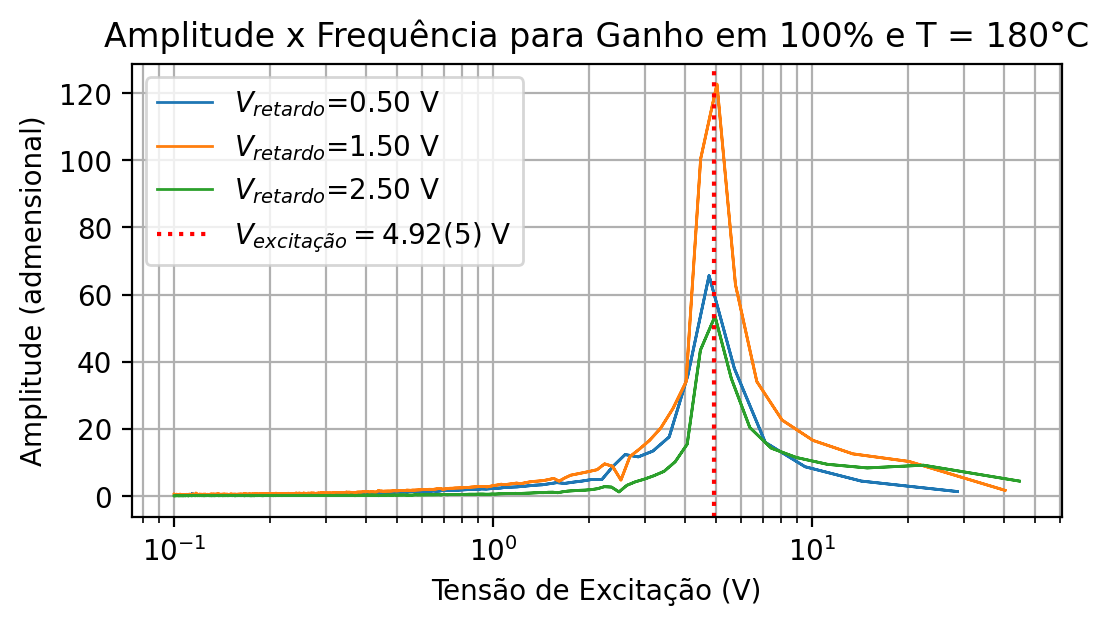

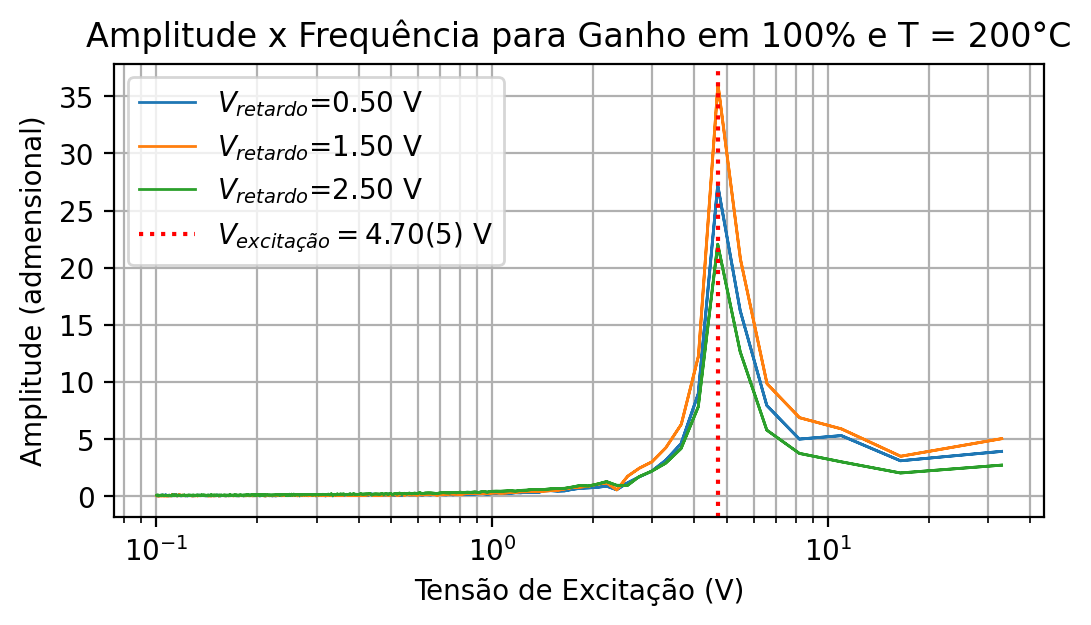

In [ ]:
'''
Mude a variavel lbl para a cor desejada para plotar o grafico respectivo.
'''

fft_periods = np.array([[],[]])
cuts = [11,11,11,19.5,19.5,19.5,5,5,5,17,17,17]

lbl_list = ['G100T150','G76T150','T180','T200']
lbl_title = ['Ganho em 100% e T = 150°C','Ganho em 76% e T = 150°C','Ganho em 100% e T = 180°C','Ganho em 100% e T = 200°C']
for lbl in lbl_list:
    plt.rcParams['font.size'] = 10
    plt.figure(figsize=(6, 3), dpi=200)
    plt.title('Amplitude x Frequência para '+lbl_title[lbl_list.index(lbl)])
    plt.xlabel(r'Tensão de Excitação (V)')
    plt.ylabel('Amplitude (admensional)')
    Tm = []
    for i in enumerate(data):
      if lbl in i[1][5]:
        x = i[1][0]
        y = i[1][1]
        #plt.plot(x, y,"-",label=i[1][5])
        arr = np.array([x,y])
        chpx = np.extract(arr[0]>cuts[i[0]],arr[0])
        chpy = np.extract(arr[0]>cuts[i[0]],arr[1])
        
        #Ajuste quadrático
        def f(A,t):
          return A[0]*t**2+A[1]*t+A[2]

        sr = 0.05

        mydata = Data(chpx, chpy, we=0.1, wd=0.1)
        myodr = ODR(mydata, quadratic)
        output = myodr.run()
        
        j = chpy-f(output.beta,chpx)
        j_fft = st.fft.fft(j)
        fr = st.fft.fftfreq(len(j_fft),sr)
        d = np.argmax(np.abs(j_fft))
        T = np.abs(1/(fr[d]))
        Tm.append(T)
        plt.xscale('log')
        lgn = re.search('(?<=VR )\d+.\d+', i[1][5]).group(0)
        plt.plot(np.abs(1/fr),np.abs(j_fft), '-', linewidth=1,label=r'$V_{retardo}$='+lgn+r' V' )
    Tm = np.array(Tm)
    Tm = np.mean(Tm)
    plt.axvline(Tm, color='r', linestyle=':', label=r'$V_{excitação}=$'+str("{:.2f}".format(Tm))+r'(5) V')
    plt.grid(True,'both')
    plt.legend()

In [3]:
def fconst(A,v):
  return A[0]*np.ones(len(v))

v = [12.61,11.96,12.96]
sv = [.05,.05,.05,.05]
mydata = Data([1,2,3], v, wd=0.05)
myodr = ODR(mydata, Model(fconst), beta0=[11])
output = myodr.run()
output.pprint()

Beta: [12.51]
Beta Std Error: [0.29297326]
Beta Covariance: [[0.33333333]]
Residual Variance: 0.2574999999999999
Inverse Condition #: 1.0
Reason(s) for Halting:
  Both sum of squares and parameter convergence
